## Домашнее задание №2

Выполнила: Машрабова Аида Шахобидиновна

Группа: М8О-311Б-22

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [65]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0 )
]

In [66]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

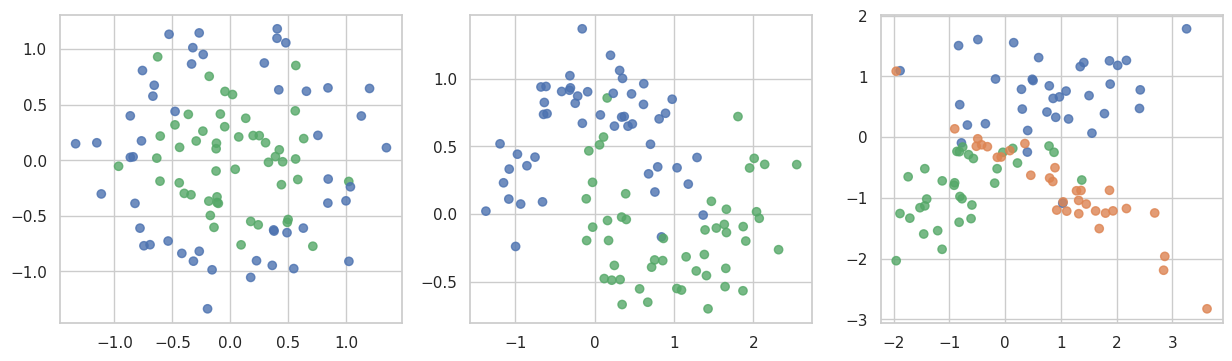

In [67]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [68]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

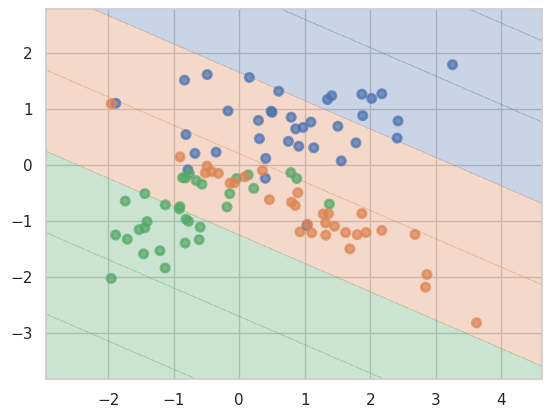

In [69]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1:
Train accuracy: 1.0000
Test accuracy: 0.7333
Overfitting: 0.2667

Dataset 2:
Train accuracy: 1.0000
Test accuracy: 0.8667
Overfitting: 0.1333

Dataset 3:
Train accuracy: 1.0000
Test accuracy: 0.8333
Overfitting: 0.1667



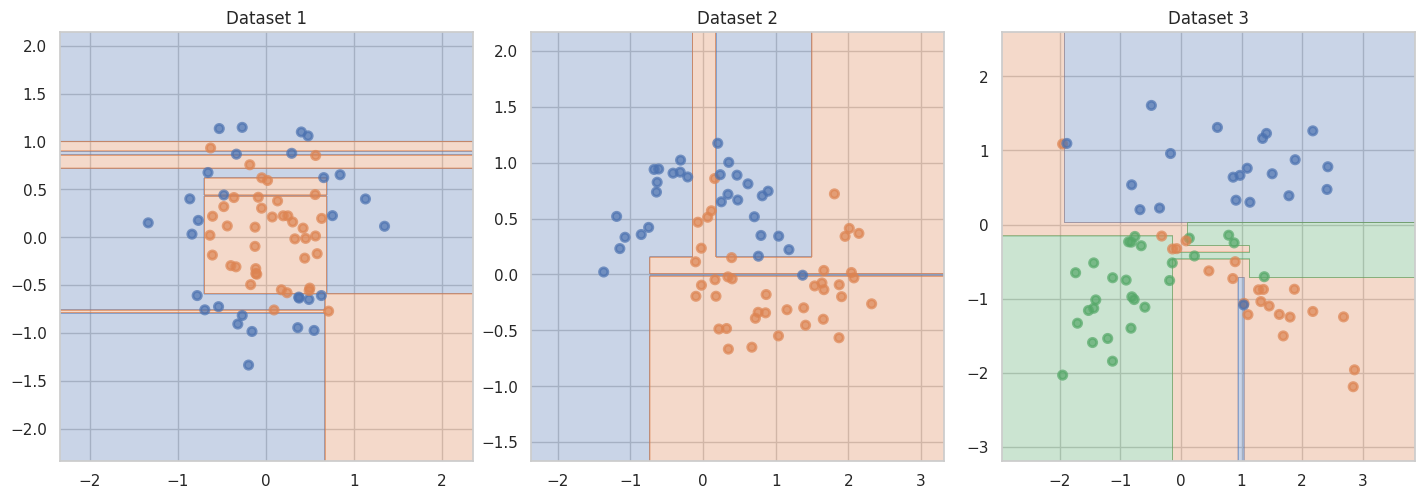

In [70]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(15, 10))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    plt.subplot(2, 3, i + 1)
    plot_surface(clf, X_train, y_train)
    plt.title(f'Dataset {i+1}')

    print(f"Dataset {i+1}:")
    print(f"Train accuracy: {train_acc:.4f}")
    print(f"Test accuracy: {test_acc:.4f}")
    print(f"Overfitting: {train_acc - test_acc:.4f}\n")

__Ответ:__ Да, деревья сильно переобучились, так как train accuracy=1.0, а test accuracy значительно ниже. На графиках это видно по изрезанным границам решений.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


Parameters: {'max_depth': 2, 'min_samples_leaf': 1}
Dataset 1:
Train accuracy: 0.8286
Test accuracy: 0.6333
Overfitting: 0.1952
Dataset 2:
Train accuracy: 0.9143
Test accuracy: 0.9333
Overfitting: -0.0190
Dataset 3:
Train accuracy: 0.9000
Test accuracy: 0.7667
Overfitting: 0.1333

Parameters: {'max_depth': 5, 'min_samples_leaf': 1}
Dataset 1:
Train accuracy: 0.9714
Test accuracy: 0.7667
Overfitting: 0.2048
Dataset 2:
Train accuracy: 1.0000
Test accuracy: 0.8667
Overfitting: 0.1333
Dataset 3:
Train accuracy: 0.9714
Test accuracy: 0.8000
Overfitting: 0.1714

Parameters: {'max_depth': None, 'min_samples_leaf': 5}
Dataset 1:
Train accuracy: 0.8714
Test accuracy: 0.9000
Overfitting: -0.0286
Dataset 2:
Train accuracy: 0.9571
Test accuracy: 0.7333
Overfitting: 0.2238
Dataset 3:
Train accuracy: 0.9000
Test accuracy: 0.7000
Overfitting: 0.2000

Parameters: {'max_depth': 3, 'min_samples_leaf': 10}
Dataset 1:
Train accuracy: 0.8143
Test accuracy: 0.7667
Overfitting: 0.0476
Dataset 2:
Train accur

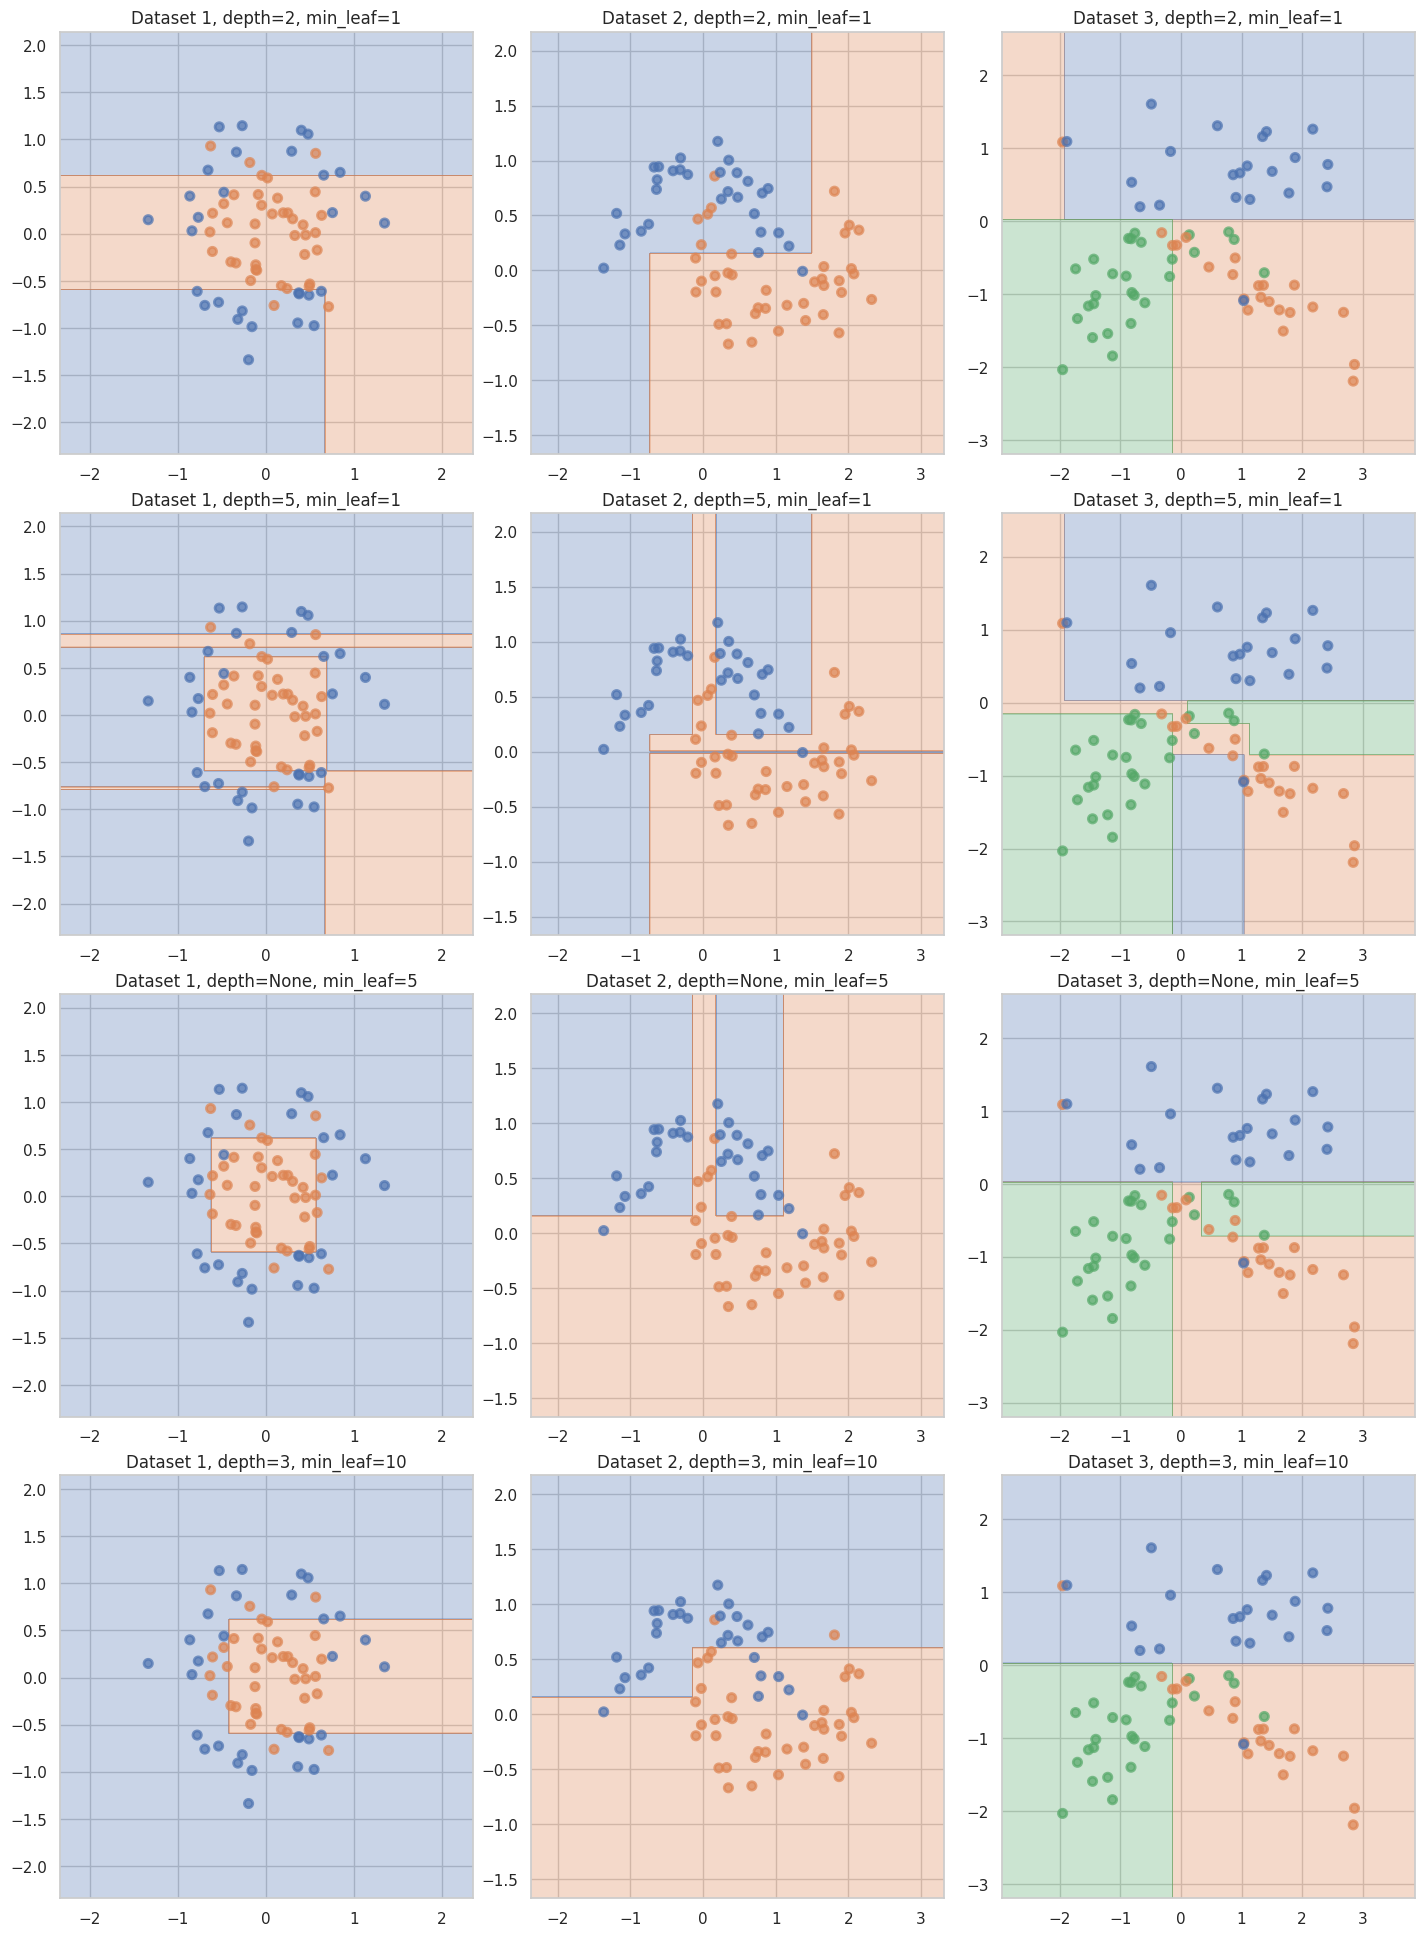

In [71]:
params_list = [
    {'max_depth': 2, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_leaf': 1},
    {'max_depth': None, 'min_samples_leaf': 5},
    {'max_depth': 3, 'min_samples_leaf': 10}
]

plt.figure(figsize=(15, 20))
for param_idx, params in enumerate(params_list):
    print(f"\nParameters: {params}")
    for i, (X, y) in enumerate(datasets):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        clf = DecisionTreeClassifier(random_state=42, **params)
        clf.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))

        plt.subplot(len(params_list), 3, param_idx * 3 + i + 1)
        plot_surface(clf, X_train, y_train)
        plt.title(f'Dataset {i+1}, depth={params.get("max_depth")}, min_leaf={params.get("min_samples_leaf")}')

        print(f"Dataset {i+1}:")
        print(f"Train accuracy: {train_acc:.4f}")
        print(f"Test accuracy: {test_acc:.4f}")
        print(f"Overfitting: {train_acc - test_acc:.4f}")

__Ответ:__ Нет, изменение разделяющей поверхности и обобщающей способности происходит по-разному для разных датасетов. Разные структуры данных требуют разных подходов к регуляризации.

Для Dataset 1 увеличение max_depth приводит к сильному переобучению (разница между train и test accuracy достигает 0.2). Однако при max_depth=2 и min_samples_leaf =5 переобучение уменьшается, но accuracy на тесте остается низким.

Для Dataset 2 даже с max_depth=5 модель показывает хорошую обобщающую способность. При min_samples_leaf=10 качество на тесте падает, но разница между train и test уменьшается.

Для Dataset 3 увеличение max_depth также приводит к переобучению, но менее выраженному, чем для Dataset 1. При min_samples_leaf=10 модель становится более устойчивой, но с потерей accuracy.

=>

max_depth: чем меньше глубина, тем проще модель и меньше переобучение, но может страдать accuracy.

min_samples_leaf: увеличение снижает переобучение, но может ухудшить качество, если данные требуют более тонких разделений.


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

Признак    Макс. Gini      Лучший порог   
STG        -0.454          0.615          
SCG        -0.465          0.425          
STR        -0.466          0.360          
LPR        -0.452          0.400          
PEG        -0.086          0.335          


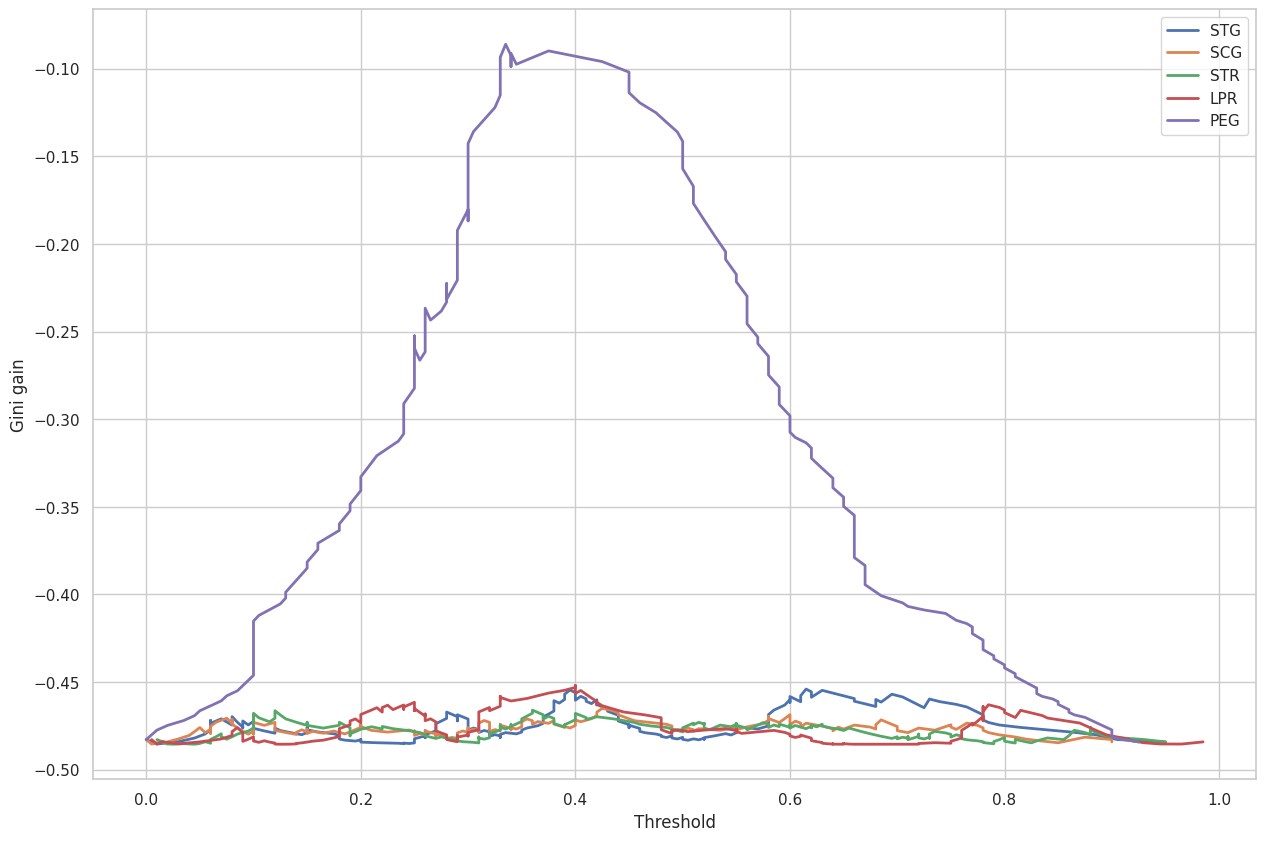

In [72]:
from hw2code import find_best_split, DecisionTree

students = pd.read_csv('students.csv')
X = students.iloc[:, :-1].values
y = students.iloc[:, -1].values
features = students.columns[:-1]

print("{:<10} {:<15} {:<15}".format("Признак", "Макс. Gini", "Лучший порог"))
plt.figure(figsize=(15, 10))
for i, feature in enumerate(students.columns[:-1]):
    feature_vector = students[feature].values
    thresholds, ginis, best_thresh, best_gini = find_best_split(feature_vector, y)
    if thresholds is not None:
        plt.plot(thresholds, ginis, label=feature, linewidth=2)
        print("{:<10} {:<15.3f} {:<15.3f}".format(feature, best_gini, best_thresh))
plt.xlabel('Threshold')
plt.ylabel('Gini gain')
plt.legend()
plt.grid(True)
plt.show()

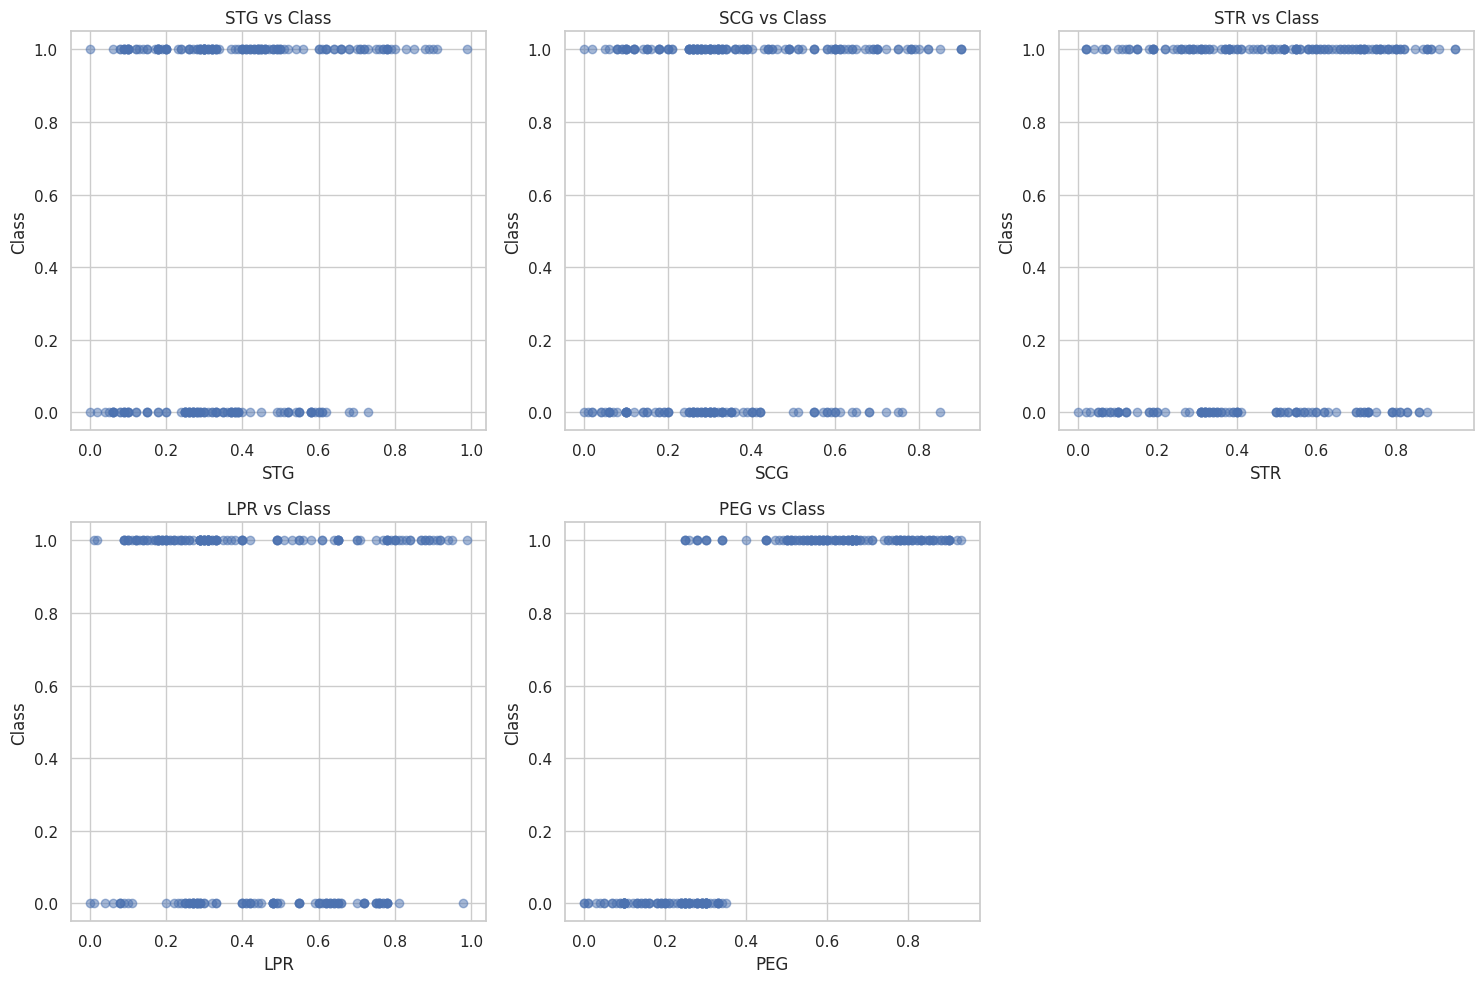

In [73]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Class')
    plt.title(f'{feature} vs Class')
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Производить деление выборки на два поддерева нужно по признаку PEG, потому что он имеет максимальное значение критерия Джини (-0.086), которое ближе всего к нулю. Это означает, что разбиение по PEG обеспечивает наибольшее уменьшение неопределённости и лучше всего разделяет классы.

Результат согласуется с визуальной оценкой scatter-графиков: на графике PEG vs Class видно, что объекты с меньшими значениями преимущественно относятся к одному классу, а с большими — к другому. Это подтверждает, что PEG эффективно разделяет данные.

Кривая для "хорошего" признака имеет выраженный пик, близкий к нулю, что указывает на чёткий порог, при котором классы разделяются почти идеально.

Для "плохих" признаков кривая Джини далека от нуля и не имеет явного пика.
Такие признаки не позволяют эффективно разделить выборку - их scatter-графики показывают равномерное смешение классов.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [74]:
from sklearn.preprocessing import LabelEncoder

mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)
label_encoder = LabelEncoder()
mushrooms_encoded = mushrooms.apply(label_encoder.fit_transform)
X = mushrooms_encoded.iloc[:, 1:].values
y = mushrooms_encoded.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X.shape[1]
clf = DecisionTree(feature_types=feature_types)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

def get_depth(self, node=None):
    if node is None:
        node = self._tree
    if node["type"] == "terminal":
        return 0
    return 1 + max(self.get_depth(node["left_child"]), self.get_depth(node["right_child"]))

DecisionTree.get_depth = get_depth
print(f"Tree depth: {clf.get_depth()}")

Accuracy: 1.0000
Tree depth: 7


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

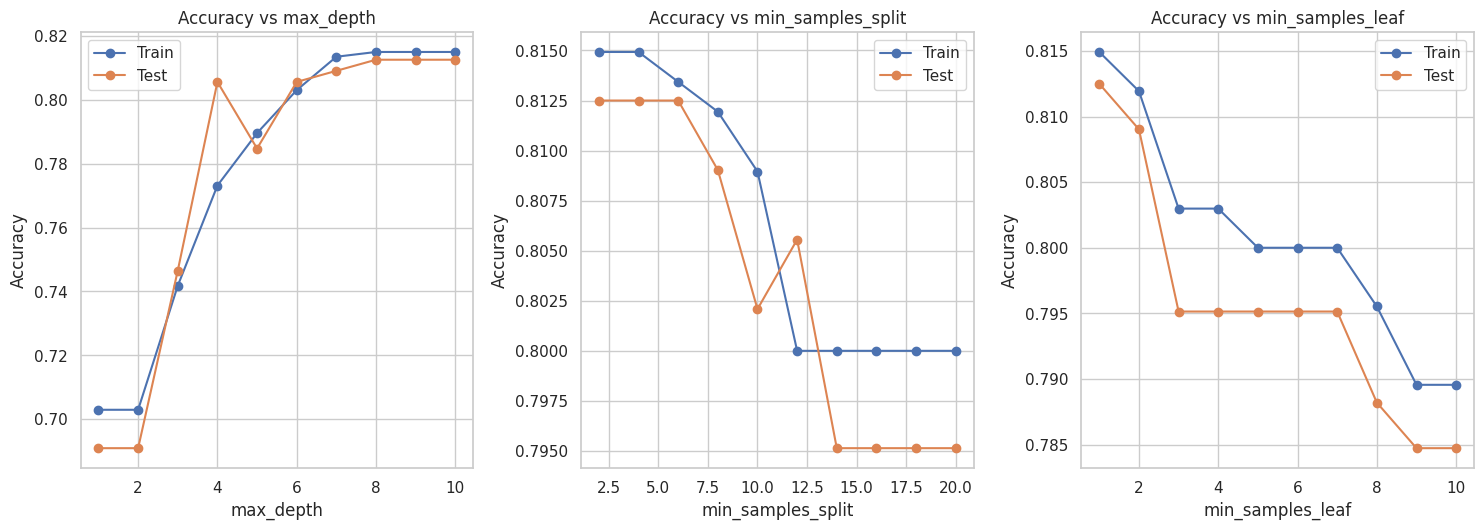

In [75]:
tic_tac_toe = pd.read_csv('tic-tac-toe-endgame.csv')
label_encoder = LabelEncoder()
X = tic_tac_toe.iloc[:, :-1].apply(label_encoder.fit_transform).values
y = (tic_tac_toe.iloc[:, -1] == 'positive').astype(int).values
feature_types = ['categorical'] * X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_ranges = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 11)
}

plt.figure(figsize=(15, 10))
for i, (param_name, param_values) in enumerate(param_ranges.items(), 1):
    train_accs = []
    test_accs = []
    for param_value in param_values:
        params = {
            'max_depth': 10 if param_name != 'max_depth' else param_value,
            'min_samples_split': 2 if param_name != 'min_samples_split' else param_value,
            'min_samples_leaf': 1 if param_name != 'min_samples_leaf' else param_value
        }
        clf = DecisionTree(feature_types=feature_types, **params)
        clf.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        train_accs.append(train_acc)
        test_accs.append(test_acc)

    plt.subplot(2, 3, i)
    plt.plot(param_values, train_accs, 'o-', label='Train')
    plt.plot(param_values, test_accs, 'o-', label='Test')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs {param_name}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter

cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header=None)

def load_data(dataset_name):
    if dataset_name == 'mushrooms':
        X = mushrooms.iloc[:, 1:]
        y = mushrooms.iloc[:, 0]
    elif dataset_name == 'tic-tac-toe':
        X = tic_tac_toe.iloc[:, :-1]
        y = tic_tac_toe.iloc[:, -1]
    elif dataset_name == 'cars':
        X = cars.iloc[:, :-1]
        y = cars.iloc[:, -1].replace({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})
    elif dataset_name == 'nursery':
        X = nursery.iloc[:, :-1]
        y = nursery.iloc[:, -1].replace({'not_recom': 0, 'recommend': 0,
                                       'very_recom': 1, 'priority': 1, 'spec_prior': 1})

    label_encoder = LabelEncoder()
    X_encoded = X.apply(label_encoder.fit_transform)
    y_encoded = label_encoder.fit_transform(y) if y.dtype == object else y.values

    return X_encoded, y_encoded

class DecisionTreeWrapper:
    def __init__(self, feature_types, max_depth=5):
        self.feature_types = feature_types
        self.max_depth = max_depth

    def fit(self, X, y):
        self.model = DecisionTree(feature_types=self.feature_types,
                                max_depth=self.max_depth)
        self.model.fit(X.values if hasattr(X, 'values') else X,
                      y.values if hasattr(y, 'values') else y)
        return self

    def predict(self, X):
        return self.model.predict(X.values if hasattr(X, 'values') else X)

class RealFeaturesWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=5):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.model = DecisionTreeWrapper(feature_types=['real']*X.shape[1],
                                      max_depth=self.max_depth)
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

class CategoricalFeaturesWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=5):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.model = DecisionTreeWrapper(feature_types=['categorical']*X.shape[1],
                                      max_depth=self.max_depth)
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

class OneHotWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    def fit(self, X, y):
        X_encoded = self.encoder.fit_transform(X)
        self.model = DecisionTreeWrapper(feature_types=['real']*X_encoded.shape[1],
                                      max_depth=self.max_depth)
        self.model.fit(pd.DataFrame(X_encoded), y)
        return self

    def predict(self, X):
        X_encoded = self.encoder.transform(X)
        return self.model.predict(pd.DataFrame(X_encoded))

def safe_cross_val(estimator, X, y, cv=5):
    try:
        return cross_val_score(estimator, X, y, cv=cv,
                             scoring=make_scorer(accuracy_score)).mean()
    except Exception as ex:
        print(f"Error with {estimator.__class__.__name__}: {str(ex)}")
        return 0

datasets = ['mushrooms', 'tic-tac-toe', 'cars', 'nursery']
max_depth = 5
results = []

for dataset in datasets:
    X, y = load_data(dataset)
    real_acc = safe_cross_val(RealFeaturesWrapper(max_depth=max_depth), X, y, cv=5)
    cat_acc = safe_cross_val(CategoricalFeaturesWrapper(max_depth=max_depth), X, y, cv=5)
    oh_acc = safe_cross_val(OneHotWrapper(max_depth=max_depth), X, y, cv=5)
    sklearn_acc = safe_cross_val(DecisionTreeClassifier(max_depth=max_depth), X, y, cv=5)
    results.append({
        'Dataset': dataset,
        'Real Features': real_acc,
        'Categorical Features': cat_acc,
        'One-Hot Encoding': oh_acc,
        'Sklearn Tree': sklearn_acc
    })

result = pd.DataFrame(results).set_index('Dataset')
pd.set_option('display.float_format', '{:.4f}'.format)
print(result)

             Real Features  Categorical Features  One-Hot Encoding  \
Dataset                                                              
mushrooms           0.2132                0.9877            0.6034   
tic-tac-toe         0.1376                0.3752            0.6524   
cars                0.8986                0.9014            0.9223   
nursery             0.9998                0.9998            0.9998   

             Sklearn Tree  
Dataset                    
mushrooms          0.9423  
tic-tac-toe        0.6473  
cars               0.8958  
nursery            0.9998  


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Нет, ранжирование алгоритмов различается для разных датасетов.

Датсеты mushrooms и nursery (лучший результат у категориального дерева и sklearn) содержат "сильные" категориальные признаки, которые хорошо разделяют классы без преобразований. One-hot encoding здесь избыточен и может ухудшить качество из-за роста размерности.

В tic-tac-toe one-hot encoding выигрывает, потому что признаки связаны сложными комбинациями, и их разделение в числовом виде теряет смысл.

Да, в результатах присутствует компонента случайности.
Она возникает из-за разбиения данных. На работу алгоритмов можно повлиять и улучшить её: увеличить число folds в кросс-валидации (это сделает оценку более стабильной) или использовать стратифицированное разбиение, чтобы сохранить распределение классов в каждой части.

